In [59]:
import xgboost as xgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error
import lightgbm as lgbm

In [58]:
! pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/74/02/5ad29a2a3d193a87d5a05fb7fd3b4e30b8eb6db7a9ddbe193beb7053978f/lightgbm-4.2.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.3 MB 330.3 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.3 MB 393.8 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.3 MB 403.5 kB/s eta 0:00:04
   --- ------------------------------------ 0.1/1.3 MB 450.6 kB/s eta 0:00:03
   ---- ----------------------------------- 0.1/1.3 MB 449.7 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.3 MB 537.4 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.3 MB 537.4 kB/s eta 0:00:03
   ------ ------------------------------


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
train_data=pd.read_csv("./GlucoseData/adolescent#005-train (1).csv")
train_data.head()

,Time,BG,CGM,CHO,insulin,LBGI,HBGI,Risk
0,5/1/2019 0:00,139.03,123.402007,0.0,0.012042,0.0,1.560543,1.560543
1,5/1/2019 0:03,139.03,129.773378,0.0,0.012042,0.0,1.560543,1.560543
2,5/1/2019 0:06,139.03,132.286047,0.0,0.012042,0.0,1.560543,1.560543
3,5/1/2019 0:09,139.03,133.100148,0.0,0.012042,0.0,1.560543,1.560543
4,5/1/2019 0:12,139.03,132.598849,0.0,0.012042,0.0,1.560543,1.560543


In [30]:
train_data.describe()

,BG,CGM,CHO,insulin,LBGI,HBGI,Risk
count,36480.000000,36480.000000,36480.000000,36480.000000,36480.000000,36480.000000,3.648000e+04
mean,184.988203,186.046692,0.135225,0.020014,1.961561,11.812314,1.377388e+01
std,75.597136,76.108993,1.751664,0.113838,9.999791,13.040539,1.495691e+01
min,13.899565,39.000000,0.000000,0.012042,0.000000,0.000000,7.220000e-09
25%,133.613057,132.220564,0.000000,0.012042,0.000000,1.028653,1.914865e+00
50%,172.331471,172.419775,0.000000,0.012042,0.000000,6.358613,8.693628e+00
75%,239.779470,241.110044,0.000000,0.012042,0.000000,20.137893,2.200848e+01
max,401.613442,407.157988,34.000000,4.268833,145.324693,57.412284,1.453247e+02


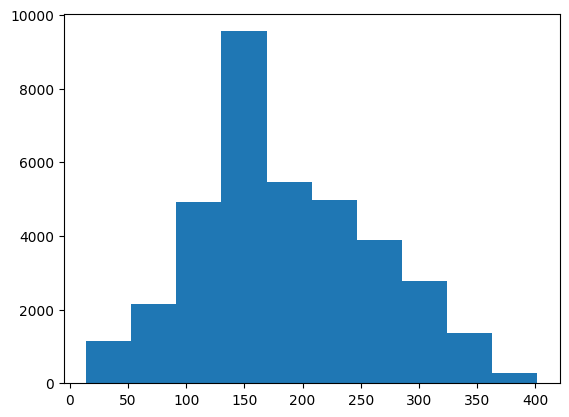

In [31]:
plt.hist(train_data["BG"])
plt.show()

In [32]:
train_data.isna().sum()

Time       0
BG         0
CGM        0
CHO        0
insulin    0
LBGI       0
HBGI       0
Risk       0
dtype: int64

In [33]:
train_data.drop(columns=["Time","Risk","HBGI","LBGI"],axis=1,inplace=True)

In [34]:
train_data.columns

Index(['BG', 'CGM', 'CHO', 'insulin'], dtype='object')

In [70]:
X=train_data[train_data.columns[1:]]
y=train_data['BG']

In [73]:
X

,CGM,CHO,insulin
0,123.402007,0.0,0.012042
1,129.773378,0.0,0.012042
2,132.286047,0.0,0.012042
3,133.100148,0.0,0.012042
4,132.598849,0.0,0.012042
...,...,...,...
36475,200.487154,0.0,0.012042
36476,201.168206,0.0,0.012042
36477,202.173203,0.0,0.012042
36478,203.195290,0.0,0.012042


In [74]:
train_features,test_features,train_y,test_y=train_test_split(X,y,test_size=.2,random_state=13445,shuffle=True)

In [75]:
train_features.shape,train_y.shape,test_features.shape,test_y.shape

((29184, 3), (29184,), (7296, 3), (7296,))

In [76]:
xgbmodel=xgb.XGBRegressor()
params={
    "max_depth":[4, 5, 6],
    "n_estimators": [500, 600, 700],
    "learning_rate": [0.01, 0.015,0.001]
    }
search = GridSearchCV(xgbmodel, params, cv=5).fit(train_features, train_y)

In [77]:
search.best_params_

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 600}

In [78]:
y_hat=search.predict(test_features)

In [85]:
mean_squared_error(test_y,y_hat,squared=False),mean_absolute_error(test_y,y_hat)

(11.518453667468957, 8.48629297195611)

In [80]:
lg=lgbm.LGBMRegressor()
params={
    "n_estimators":[10,100,1000],
    "learning_rate":[0.1,0.01,0.001],
    "num_leaves":[15,30,50,100]
}
ss=GridSearchCV(lg,params,cv=5).fit(train_features,train_y)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 355
[LightGBM] [Info] Number of data points in the train set: 23347, number of used features: 3
[LightGBM] [Info] Start training from score 184.939211
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000113 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 358
[LightGBM] [Info] Number of data points in the train set: 23347, number of used features: 3
[LightGBM] [Info] Start training from score 185.033195
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000104 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

In [86]:
y_hatt=ss.predict(test_features)

In [88]:
mean_squared_error(test_y,y_hatt,squared=False),mean_absolute_error(test_y,y_hatt)

(11.49045538732597, 8.463025606342036)

In [96]:

xgb_final=xgb.XGBRegressor(learning_rate=0.01,n_estimators=600,depth=4)

In [97]:
xgb_final.fit(train_features,train_y)
final_xgb=xgb_final.predict(test_features)

c:\Users\monce\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [13:51:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "depth" } are not used.

  warnings.warn(smsg, UserWarning)


In [99]:
mean_squared_error(test_y,final_xgb,squared=False),mean_absolute_error(test_y,final_xgb)

(11.524433944249939, 8.490044134083595)

In [100]:
testing_data=pd.read_csv("./GlucoseData/adolescent#005-test (1).csv")
testing_data.isna().sum()

Time       0
BG         0
CGM        0
CHO        0
insulin    0
LBGI       0
HBGI       0
Risk       0
dtype: int64

In [101]:
testing_data.drop(columns=["Time","Risk","HBGI","LBGI"],axis=1,inplace=True)

In [103]:
testing_data=testing_data[["CGM","CHO","insulin"]]

In [106]:
xgb_final.predict(testing_data)

array([204.47173, 204.47173, 202.40746, ..., 118.96782, 112.16715,
       105.88182], dtype=float32)

In [107]:
testing_data

,CGM,CHO,insulin
0,204.233450,0.0,0.012042
1,204.027143,0.0,0.012042
2,203.325112,0.0,0.012042
3,202.126760,0.0,0.012042
4,200.447743,0.0,0.012042
...,...,...,...
6715,121.046577,0.0,0.012042
6716,118.734379,0.0,0.012042
6717,115.400519,0.0,0.012042
6718,110.980437,0.0,0.012042


In [110]:
import pickle
filee="saved_version.pkl"
pickle.dump(xgb_final,open(filee,"wb"))